# 08 - **Monte Carlo**

This notebook shows using different methods such as riemann sum and monte carlo method to estimate simple integrals. It also demonstrates uniform sampling on a disk, the right way and the wrong way.


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from ipywidgets import interactive
import ipywidgets as widgets
import math
import imageio


## Estimating an integral

Here we show two ways to estimate a single 1D function. To evaluate these two estimates, we analytically compute the true integral of the function.

We can see both riemann sum and monte carlo are able to improve performance with more samples. For this simple and smooth function, Riemann sum converges faster.

In [ ]:
def analy_int(x):
  return np.sin(x) - x * np.cos(x)

def function(x):
  return x * np.sin(x)

plt.figure(figsize=(10, 5))
def riemannint(function, a, b, n):
  sumval = 0
  h = (b-a)/n
  curvals = np.zeros((n,))
  curx = np.zeros((n,))
  for i in range(0, n):
    current_x = a+i*h
    curval = function(current_x) * h
    curx[i] = current_x
    curvals[i] = curval
    sumval += curval
  plt.subplot(2, 1, 1)
  plt.plot(curx, curvals, 'b.')
  return sumval

def montecarlo_uniform(function, a, b, n):
  sumval = 0.0
  curx = np.random.uniform(a,b,n)
  curvals = np.zeros((n,))
  for indx, i in enumerate(curx):
    i = float(i)
    curval = function(i) * (b-a)/n
    curvals[indx] = curval
    sumval += curval
  plt.subplot(2, 1, 2)
  plt.plot(curx, curvals, 'm.')
  return sumval

def plot_estimate(samples):
  a = 0
  b = 50
  sum_mce = montecarlo_uniform(function, a, b, samples)
  sum_rms = riemannint(function, a, b, samples)
  print('Monte Carlo estimation: %f'%(sum_mce))
  print('Riemann Sum estimation: %f'%(sum_rms))
  print('Analytical Sum (true): %f'%(analy_int(b) - analy_int(a)))

plt.show()  

interactive_plot = interactive(plot_estimate, samples=(5, 1000))  # index starts from zero
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


<Figure size 720x360 with 0 Axes>

interactive(children=(IntSlider(value=502, description='samples', max=1000, min=5), Output(layout=Layout(heigh…

### Importance sampling

Here we estimate the integral of the sin function using uniform monte carlo and a pdf that approxiamtes the shape of the sin function for importance sampling

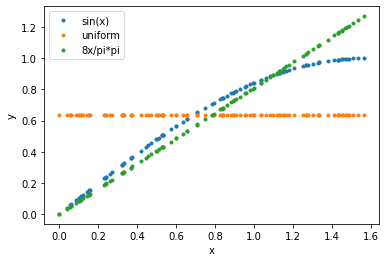

interactive(children=(IntSlider(value=502, description='samples', max=1000, min=5), IntSlider(value=25, descri…

In [ ]:
def plot_func(n):
  x = np.pi/2 * np.random.random_sample((n,))
  y1 = np.sin(x)
  y2 = (2 / np.pi) * np.ones_like(x)
  y3 = 8*x / np.pi**2
  plt.plot(x, y1, '.')
  plt.plot(x, y2, '.')
  plt.plot(x, y3, '.')
  plt.legend(['sin(x)', 'uniform', '8x/pi*pi'])
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

def montecarlo(n, num_trial):
  uniform_trial = np.zeros((num_trial,))
  import_trial = np.zeros((num_trial,))
  for ti in range(num_trial):
    sum_uniform = 0.
    sum_import = 0.
    for i in range(n):
      rand = np.random.uniform()
      sum_uniform += math.sin(rand * np.pi * 0.5)
      xi = np.sqrt(rand) * np.pi * 0.5
      sum_import += math.sin(xi) / ((8*xi)/np.pi**2)
    sum_uniform *= np.pi * 0.5 / float(n)
    sum_import *= 1./n
    # print('Using uniform samling estimates:%f'%(sum_uniform))
    # print('Using importance samling estimates:%f'%(sum_import))
    uniform_trial[ti] = sum_uniform
    import_trial[ti] = sum_import
  return uniform_trial, import_trial

plot_func(100)

def compare_sampling(samples, num_trial):
  uniform_trial, import_trial = montecarlo(n=samples, num_trial=num_trial)
  plt.plot(uniform_trial, 'bo-')
  plt.plot(import_trial, 'mo-')
  plt.plot(np.ones_like(import_trial), 'ro-')
  plt.legend(['uniform sampling', 'importance sampling', 'true integral'])
  plt.ylim([0.95, 1.05])
  plt.xlabel('Trial')
  plt.ylabel('Integrated value')
  plt.show()

interactive_plot = interactive(compare_sampling, samples=(5, 1000), num_trial=(1, 50))  # index starts from zero
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


## Uniform sampling on a unit disk

In [ ]:

def uniform_biased(sample):
  r = np.random.uniform(0, 1, sample)
  theta = np.random.uniform(0, 2*np.pi, sample)
  
  plt.subplot(1, 2, 1)
  plt.scatter(r * np.cos(theta), r*np.sin(theta), alpha=0.5)
  plt.axis('equal')
  plt.title('Biased sampling')

def uniform_unbiased(sample):
  r = np.random.uniform(0, 1, sample)
  theta = np.random.uniform(0, 1, sample)

  r = np.sqrt(r)
  theta = 2 * np.pi * theta
  ;
  plt.subplot(1, 2, 2)
  plt.scatter(r * np.cos(theta), r*np.sin(theta), alpha=0.5)
  plt.axis('equal')
  plt.title('Unbiased sampling')

def sample_disc(samples):
  plt.figure(figsize=(15, 5))
  uniform_biased(samples)
  uniform_unbiased(samples)
  plt.show()  

interactive_plot = interactive(sample_disc, samples=(0, 1000))  # index starts from zero
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


interactive(children=(IntSlider(value=500, description='samples', max=1000), Output(layout=Layout(height='400p…